In [109]:
import pandas as pd
import numpy as np

In [28]:
HW3 = pd.read_excel("HW3 (1).xlsx")

In [70]:
HW3.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [137]:
#HW3.describe()
HW3['Purchase'].value_counts()

0    1000
1    1000
Name: Purchase, dtype: int64

<AxesSubplot:>

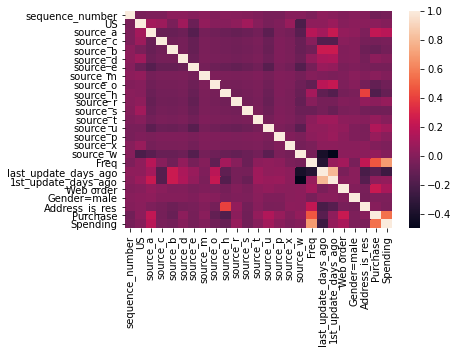

In [135]:
import seaborn as sns

corr = HW3.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

(10 points) After you import the dataset on Rapidminer and you specify any special roles (e.g., target variable) and feature types, please show a screenshot of the Statistics of the imported dataset. Please clearly indicate what attributes you will not use to build the predictive models and briefly explain why.


In [155]:
X = HW3.drop(['Spending','Purchase'],axis=1)
y = HW3['Spending']

## Linear Regression

In [12]:
# This script illustrates how to solve a simple regression task using Python and scikit-learn. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [48]:
#train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
#linear regression model
lr = linear_model.LinearRegression()

#fit model to train data
lr.fit(X_train,y_train)

#predict model to train data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [49]:
# estimated coefficients for the linear regression model
print('Slope: %.3f' % lr.coef_[0])            
# estimated intercept for the linear regression model
print('Intercept: %.3f' % lr.intercept_)   

Slope: -0.009
Intercept: 8.510


In [50]:
#RMSE:
from sklearn.metrics import mean_squared_error  # mean squared error regression loss

print('RMSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

RMSE train: 117.803, test: 145.154


## Lasso

In [56]:
from sklearn.linear_model import Lasso # lasso Regression class
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance
                                                 # the standard score of a sample x is calculated as: z = (x - u) / s
                                                # where u is the mean of the training sample , and s is the standard deviation of the training sample.
                                                 # centering and scaling happens independently on each feature.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [60]:
lasso = Lasso(alpha=0.1)   # alpha : constant that multiplies the L1 term, controlling regularization strength 
                           # the larger the value of alpha, the more aggressive the penalization is.
                           # alpha defaults to 1.0 
                           # alpha = 0 is equivalent to an ordinary least square Linear Regression 
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)         # computes the mean and std to be used for scaling and performs scaling
X_test = scaler.transform(X_test)               # performs standardization of test set X attributes by centering and scaling

lasso.fit(X_train, y_train)                     # fit model to data
y_train_pred_lasso = lasso.predict(X_train)           # apply model to train data
y_test_pred_lasso = lasso.predict(X_test)             # apply model to test data
print(lasso.coef_)                              # estimated coefficients for the lasso regression model

[ -4.91573333  -0.64298327  13.69556983  -9.56896491  -0.67249477
  -3.92356296  -3.18949329   1.19768326   3.38231858 -20.69305723
   5.06882922  -0.78779562  -2.45804181   7.76050951  -1.21109025
  -0.20436088   8.75787912 126.70658987 -18.84284719   8.80972671
   6.79441737  -4.83282808 -24.33951374]


In [61]:
print('RMSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred_lasso,squared=False),
        mean_squared_error(y_test, y_test_pred_lasso,squared=False)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

RMSE train: 117.804, test: 145.131


## Ridge

In [62]:
from sklearn.linear_model import Ridge # ridge Regression class

In [63]:
ridge = Ridge(alpha=1.0)               # regularization strength; must be a positive float. 
                                       # larger values specify stronger regularization. 
                                       # alpha corresponds to C^-1 in other linear models such as LogisticRegression

ridge.fit(X_train, y_train)            # fit model (features have been scaled)
y_train_pred_ridge = ridge.predict(X_train)  # apply model to train data
y_test_pred_ridge = ridge.predict(X_test)    # apply model to test data
print(ridge.coef_)                     # estimated coefficients for the ridge regression model


[ -5.0120003   -0.73652493  13.59433722  -9.72643821  -0.89370779
  -4.09425998  -3.43499894   1.27363342   3.3011761  -20.75164044
   5.07423315  -0.94711032  -2.61980391   7.68944348  -1.37289797
  -0.35060998   8.77674606 126.37957072 -19.62577808   9.67072032
   6.88694205  -4.93900875 -24.41740687]


In [65]:
print('RMSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred_ridge,squared=False),
        mean_squared_error(y_test, y_test_pred_ridge,squared=False)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

RMSE train: 117.803, test: 145.161


## k-NN

In [66]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [171]:
HW3_max_scaled = HW3.copy()
  
# apply normalization techniques
for column in HW3_max_scaled.columns:
    HW3_max_scaled[column] = HW3_max_scaled[column]  / HW3_max_scaled[column].abs().max()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,0.0005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.133333,0.874403,0.874403,1.0,0.0,1.0,1.0,0.085243
1,0.0010,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.692455,0.692455,1.0,1.0,0.0,0.0,0.000000
2,0.0015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.133333,0.927173,0.934575,0.0,0.0,0.0,1.0,0.084983
3,0.0020,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.197947,0.197947,0.0,1.0,0.0,0.0,0.000000
4,0.0025,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.207498,0.207498,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.9980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.406160,0.406160,1.0,0.0,0.0,1.0,0.019666
1996,0.9985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.628701,0.628701,1.0,1.0,0.0,1.0,0.006666
1997,0.9990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.810411,0.810411,0.0,0.0,0.0,0.0,0.000000
1998,0.9995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.066667,0.060411,0.060411,0.0,1.0,1.0,0.0,0.000040


In [177]:
X = HW3_max_scaled.drop(['Spending','Purchase'],axis=1)
y = HW3['Spending']
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [187]:
#3NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 3)

#Fit and Evaluate Model
knn_regressor.fit(X_train, y_train)        # fit the model
pred=knn_regressor.predict(X_test)         # make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse on test set

print('RMSE value is:', error)

RMSE value is: 193.16683043586673


In [180]:
#5NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 5)

#Fit and Evaluate Model
knn_regressor.fit(X_train, y_train)        # fit the model
pred=knn_regressor.predict(X_test)         # make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse on test set

print('RMSE value is:', error)

RMSE value is: 178.14032510363845


In [185]:
#15NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 15)

#Fit and Evaluate Model
knn_regressor.fit(X_train, y_train)        # fit the model
pred=knn_regressor.predict(X_test)         # make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse on test set

print('RMSE value is:', error)

RMSE value is: 180.3423176014006


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#%pip install mlxtend

In [126]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [125]:
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [130]:
# Create a forward fit model
sfs1 = SFS(lr, 
          k_features=(1,23), 
          forward=True, # Forward fit
          floating=True, 
          scoring='neg_mean_squared_error',
          cv=5)

In [131]:
fit1 = sfs1.fit(X, y)
names=fit1.k_feature_names_
print(names)
mse=fit1.k_score_
rmse=sqrt(-mse)
print("rmse: ",rmse)

('US', 'source_a', 'source_c', 'source_o', 'source_h', 'source_r', 'source_u', 'Freq', 'last_update_days_ago', 'Web order', 'Address_is_res')
rmse:  127.88131560389964


In [132]:
# Create a backward fit model
sfs2 = SFS(lr, 
          k_features=(1,23), 
          forward=False, # backward fit
          floating=True, 
          scoring='neg_mean_squared_error',
          cv=5)

In [133]:
fit2 = sfs2.fit(X, y)
names=fit2.k_feature_names_
print(names)
mse=fit2.k_score_
rmse=sqrt(-mse)
print("rmse: ",rmse)

('US', 'source_a', 'source_c', 'source_o', 'source_h', 'source_r', 'source_u', 'Freq', 'last_update_days_ago', 'Web order', 'Address_is_res')
rmse:  127.88131560389964


(10 points) In step (b), suppose your colleague includes the Purchase attribute as a predictor when building predictive models for the target variable “Spending”. Do you think this is a good choice? Please justify your opinion.